<a href="https://colab.research.google.com/github/tuanlamdao/datascience/blob/master/4_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Regression tasks with diabetes data set

In [1]:
%matplotlib inline

In [2]:
from sklearn import (datasets as ds, metrics ,
                    model_selection as skms,
                     neighbors,linear_model)
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
diabetes = ds.load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetes_df['target'] = diabetes.target
display(pd.concat([diabetes_df.head(3),diabetes_df.tail(3)]))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

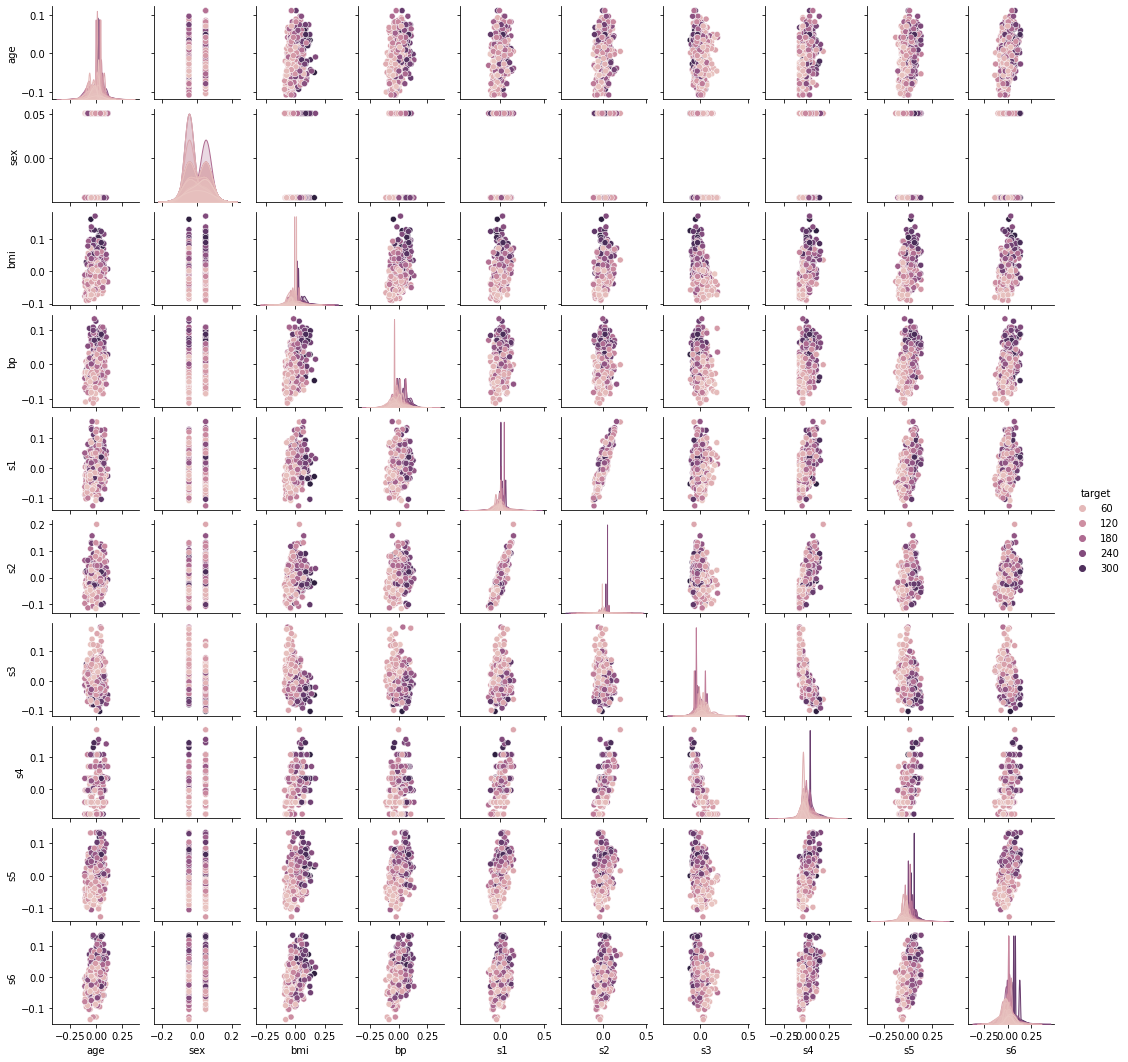

In [4]:
sns.pairplot(diabetes_df,hue = 'target', height=1.5)

In [5]:
(diabetes_train_ftrs, diabetes_test_ftrs, diabetes_train_tgt, diabetes_test_tgt) = skms.train_test_split(diabetes.data,diabetes.target, test_size=.25)
# we set random_state so the result are reproducible otherwise we get different training and testing sets for each time of running
print('Train feature size: ',diabetes_train_ftrs.shape)
print('Test feature size: ',diabetes_test_ftrs.shape)

Train feature size:  (331, 10)
Test feature size:  (111, 10)


In [6]:
models = {'3NN ': neighbors.KNeighborsRegressor(n_neighbors=3),
          'Linear Regression ': linear_model.LinearRegression()}
for name, model in models.items():
    fit = model.fit(diabetes_train_ftrs, diabetes_train_tgt)
    preds = fit.predict(diabetes_test_ftrs)
    score = metrics.mean_squared_error(diabetes_test_tgt, preds)
    print("{:>3s}: {:0.2f}".format(name,score))

3NN : 3731.83
Linear Regression : 3292.68


Let look at the range values that the target can take:

In [7]:
diabetes_df['target'].max() - diabetes_df['target'].min()

321.0

the target values span about 300 units and our prediction are off - in some average sense - by sqrt(3471.42) ~ 60 units. That is around 20%

###### 4 methods of Linear regression
1 - random guessing

In [8]:
tgt = np.array([3,5,8,10,12,15])
num_guesses = 10
results = []
for g in range(num_guesses):
    guess = np.random.uniform(low=tgt.min(), high=tgt.max())
    total_dist = np.sum((tgt - guess)**2)
    results.append((total_dist, guess))
print(results)
best_guess = sorted(results)[0][1]
best_guess


[(100.28652548808947, 9.32547019687777), (98.94276803697333, 8.698281057257239), (196.4559664311024, 4.7996701285493515), (269.00285669425125, 3.5077735292545498), (138.02847947246914, 6.27745298470145), (133.6853603070846, 11.24345182882103), (232.31724028407072, 4.116627085842093), (279.5344130190164, 3.3454515366579978), (314.2665997989386, 14.825456864347544), (171.83246266862915, 5.3452792116370205)]


8.698281057257239

2 - Random steps

In [9]:
num_steps = 10000
step_size = .05
best_guess = np.random.uniform(low=tgt.min(), high=tgt.max())
best_dist  = np.sum((tgt - best_guess)**2)
for s in range(num_steps):
    new_guess = best_guess + (np.random.choice([+1, -1]) * step_size)
    new_dist = np.sum((tgt - new_guess)**2)
    if new_dist < best_dist:
        best_guess, best_dist = new_guess, new_dist
print(best_guess)


8.84003873269757


3 - Smart steps

In [10]:
num_steps = 1000
step_size = .02
best_guess = np.random.uniform(low=tgt.min(), high=tgt.max())
best_dist  = np.sum((tgt - best_guess)**2)
print('start: ', best_guess)
for s in range(num_steps):
    guesses = best_guess + (np.array([-1, 1]) * step_size)
    dists = np.sum((tgt[:, np.newaxis] - guesses)**2, axis=0)
    better_idx = np.argmin(dists)
    if dists[better_idx] > best_dist:
        break
    best_guess = guesses[better_idx]
    best_dist = dists[better_idx]
print(' end: ', best_guess)


start:  9.143694789375367
 end:  8.823694789375374


4 - calculated shortcuts

In [11]:
print('mean: ', np.mean(tgt))

mean:  8.833333333333334


In [12]:
models = {'3NN ': neighbors.KNeighborsRegressor(n_neighbors=3),
          'Linear Regression ': linear_model.LinearRegression()}
for name, model in models.items():
    fit = model.fit(diabetes_train_ftrs, diabetes_train_tgt)
    preds = fit.predict(diabetes_test_ftrs)
    score = np.sqrt(metrics.mean_squared_error(diabetes_test_tgt, preds))
    print("{:>3s}: {:0.2f}".format(name,score))

3NN : 61.09
Linear Regression : 57.38
